<a href="https://colab.research.google.com/github/JorgeZarama/DeepLearning/blob/main/07MIAR_VC04_VC05_Deep_Vision_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07MAIR - Redes Neuronales y Deep Learning
## VC04_V05: Deep Learning y Deep vision

In [ ]:
# SOLO PARA USO EN GOOGLE COLABORATORY
# Para conectar el notebook con la cuenta de gdrive
from google.colab import drive
drive.mount('/content/drive/')

BASE_FOLDER = '/content/drive/My Drive/VIU/07_RN_MIAR/03.Materiales_del_profesor/' # Se debe garantizar que la carpeta docencia compartida se almacena en el directorio raíz de Google Drive. En caso contrario modificar este path

In [9]:
# Funciones base

import matplotlib.pyplot as plt
import numpy as np

def visualize_learning_curve(H):
  epochs = len(H.history["loss"])
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

from sklearn.metrics import classification_report

def evaluate_model(model, x, y):
  print("[INFO]: Evaluando red neuronal...")
  predictions = model.predict(x, batch_size=128)
  print(classification_report(y, predictions.argmax(axis=1)))

## **INTRODUCCIÓN A LAS CONVOLUTIONAL NEURAL NETWORKS: MNIST DATASET**

#### **- Cargando el conjunto de datos**

In [10]:
# Cargar dataset de mnist
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


#### **- Acondicionando el conjunto de datos**

In [11]:
# Pre-procesado obligatorio cuando trabajo con redes neuronales
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.backend import expand_dims
import numpy as np


#Normalizar la intensidad de las Imágenes
x_tr, x_te = x_train/255, x_test/255
#particionar los datos trian/vluar Split
x_tr, x_val, y_tr, y_val = train_test_split(x_tr, y_train, test_size=0.1, random_state=42)
#Añadir canales en array
x_tr =np.expand_dims(x_tr, axis=3)
x_val =np.expand_dims(x_val, axis=3)
x_te =np.expand_dims(x_te, axis=3)

print(x_val.shape)


(6000, 28, 28, 1)


#### **- Creando la topología de Red Neuronal (CNN) y entrenándola**

In [12]:
# Construccion de una red CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Red feedforward API secuencial
convnet = Sequential()

# BASE MODEL

# BM Bloque 1

convnet.add(layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation="relu", padding="same"))
convnet.add(layers.MaxPooling2D((2,2)))

# BM Bloque 2

convnet.add(layers.Conv2D(64, (3,3), activation="relu", padding="same"))
convnet.add(layers.MaxPooling2D((2,2)))

# BM Bloque 3

convnet.add(layers.Conv2D(64, (3,3), activation="relu", padding="same"))
convnet.add(layers.MaxPooling2D((2,2)))

# TOP MODEL
convnet.add(layers.Flatten())
convnet.add(layers.Dense(64, activation="relu"))
convnet.add(layers.Dense(10, activation="softmax"))



convnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 64)         

In [13]:
# Compilación
convnet.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy", # Etiquetas categoricas
                #loss="categorical_crossentropy"         #Etiquetas one-hot.encoding (e.g [0,0,0,1])
                metrics=["accuracy"]
                )

In [14]:
# Entrenamiento

H = convnet.fit(x_tr, y_tr, epochs=5, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/5
422/422 [==============================] - 9s 7ms/step - loss: 0.2678 - accuracy: 0.9166 - val_loss: 0.0668 - val_accuracy: 0.9808
Epoch 2/5
422/422 [==============================] - 3s 6ms/step - loss: 0.0632 - accuracy: 0.9803 - val_loss: 0.0482 - val_accuracy: 0.9852
Epoch 3/5
422/422 [==============================] - 3s 6ms/step - loss: 0.0456 - accuracy: 0.9862 - val_loss: 0.0451 - val_accuracy: 0.9870
Epoch 4/5
422/422 [==============================] - 2s 6ms/step - loss: 0.0351 - accuracy: 0.9888 - val_loss: 0.0381 - val_accuracy: 0.9895
Epoch 5/5
422/422 [==============================] - 2s 6ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.0374 - val_accuracy: 0.9893


#### **- Observando el proceso de entrenamiento para tomar decisiones**

[INFO]: Evaluando red neuronal...
79/79 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



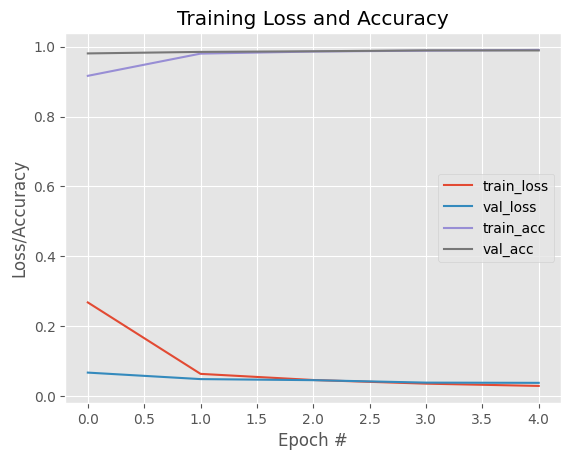

In [15]:
# Evaluación + Testeo

# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(convnet, x_te, y_test)


## **¿POR QUE CONVOLUTIONAL NEURAL NETWORKS?: CIFAR DATASET**

#### **- Cargando el conjunto de datos y acondicionándolo**

In [16]:
# Importando el set de datos CIFAR10
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]

print("[INFO]: Loading CIFAR-10 data...")
((x_train, y_train), (x_test, y_test)) = cifar10.load_data()

# Normalizar intensidad de imagenes
x_tr, x_te = x_train.astype("float") / 255, x_test.astype("float")  / 255

# Particion de los datos: train/val split
x_tr, x_val, y_tr, y_val = train_test_split(x_tr, y_train, test_size=0.1, random_state=42)

print(x_tr.shape)
print(y_tr.shape)

[INFO]: Loading CIFAR-10 data...
(45000, 32, 32, 3)
(45000, 1)


#### **- Inspeccionando el conjunto de datos**

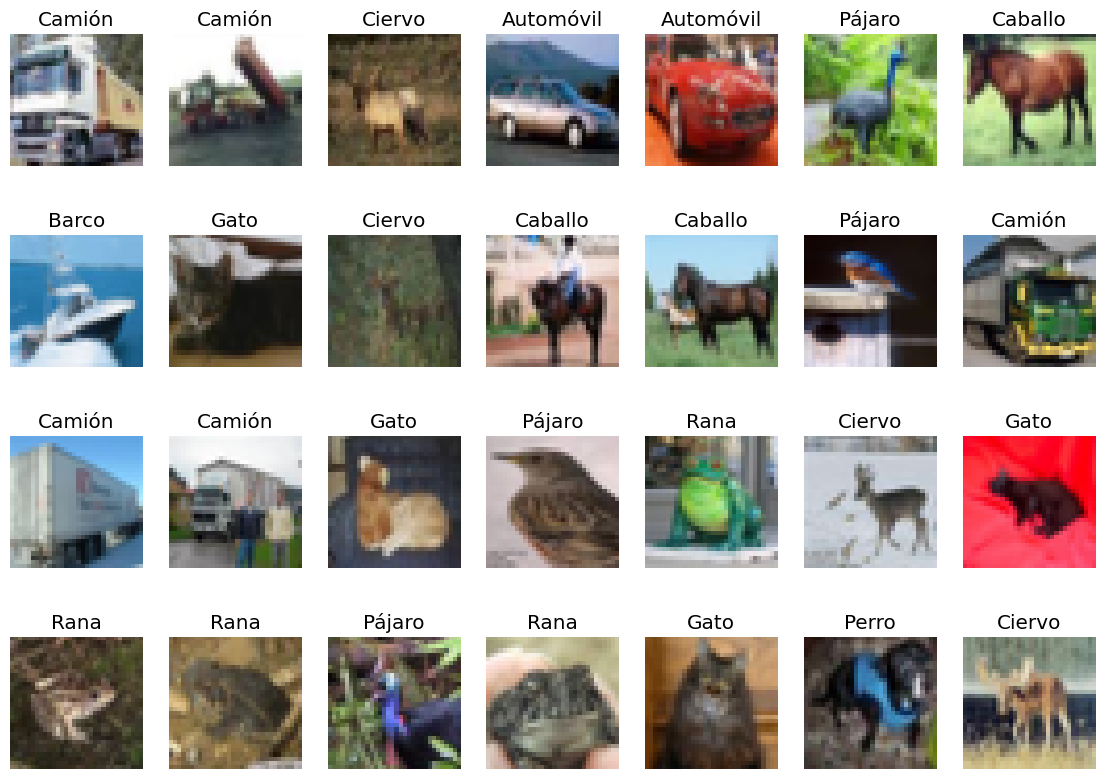

In [17]:
# Inspección del conjunto de datos
import matplotlib.pyplot as plt

fig =  plt.figure(figsize=(14,10))
for n in range (1,29):
    fig.add_subplot(4,7,n)
    img = x_train[n]
    plt.imshow(img)
    plt.title(labelNames[y_train[n][0]])
    plt.axis("off")


#### **- Creando la topología de red neuronal y entrenándola: MLP**

[INFO]: Entrenanado la red neuronal...
Epoch 1/50
352/352 [==============================] - 5s 12ms/step - loss: 2.0255 - accuracy: 0.2694 - val_loss: 1.9316 - val_accuracy: 0.2978
Epoch 2/50
352/352 [==============================] - 6s 18ms/step - loss: 1.8056 - accuracy: 0.3555 - val_loss: 1.8216 - val_accuracy: 0.3406
Epoch 3/50
352/352 [==============================] - 5s 15ms/step - loss: 1.7255 - accuracy: 0.3858 - val_loss: 1.6918 - val_accuracy: 0.3874
Epoch 4/50
352/352 [==============================] - 4s 11ms/step - loss: 1.6631 - accuracy: 0.4101 - val_loss: 1.7402 - val_accuracy: 0.3658
Epoch 5/50
352/352 [==============================] - 5s 13ms/step - loss: 1.6200 - accuracy: 0.4260 - val_loss: 1.6671 - val_accuracy: 0.4012
Epoch 6/50
352/352 [==============================] - 4s 11ms/step - loss: 1.5801 - accuracy: 0.4375 - val_loss: 1.5887 - val_accuracy: 0.4288
Epoch 7/50
352/352 [==============================] - 3s 9ms/step - loss: 1.5431 - accuracy: 0.4529 - v

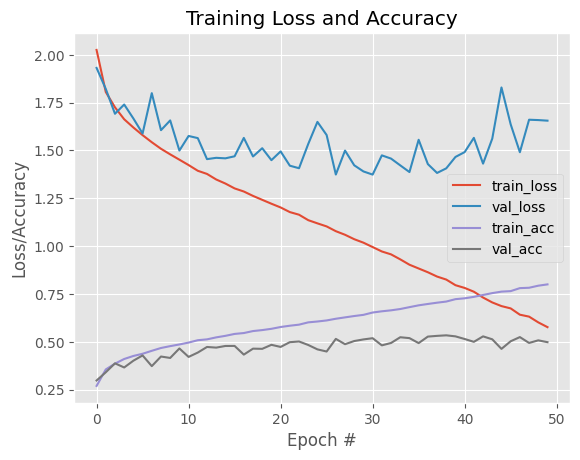

In [18]:
# Construccion de una red CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD

# Arquitectura de red - modo API Sequential

mpl = Sequential()
mpl.add(Flatten())
mpl.add(Dense(2048, input_shape=(32*32*3,), activation="relu"))
mpl.add(Dense(1024, activation="relu"))
mpl.add(Dense(512, activation="relu"))
mpl.add(Dense(128, activation="relu"))
mpl.add(Dense(32, activation="relu"))
mpl.add(Dense(10, activation="softmax"))

# Compilamos el modelo y entrenamos
mpl.compile(optimizer=SGD(learning_rate=0.01),
              loss="sparse_categorical_crossentropy", # Etiquetas categoricas
              #loss="categorical_crossentropy"         #Etiquetas one-hot.encoding (e.g [0,0,0,1])
              metrics=["accuracy"]
             )
# Entrenamos el perceptrón multicapa
print("[INFO]: Entrenanado la red neuronal...")
H = mpl.fit(x_tr, y_tr, epochs=50, batch_size=128, validation_data=(x_val, y_val))


# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(mpl, x_te, y_test)

#### **- Creando la topología de red neuronal y entrenándola: CNN**

In [19]:
# Arquitectura de red - modo API Funcioanl
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


# Definimos la entrada
input = layers.Input(shape=(x_tr.shape[1], x_tr.shape[2], x_tr.shape[3]))

# 1.BASE MODEL
# Bloque 1
x1 = layers.Conv2D(32, (3,3), padding="same", activation="relu")(input)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Conv2D(32, (3,3), padding="same", activation="relu")(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.MaxPooling2D(pool_size=(2,2))(x1)
#Se podría añador dropout

# Bloque 2
x2 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(x1)
x2 = layers.BatchNormalization()(x2)
x2 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(x2)
x2 = layers.BatchNormalization()(x2)
x2 = layers.MaxPooling2D(pool_size=(2,2))(x2)

# Bloque 3
x3 = layers.Conv2D(256, (3,3), padding="same", activation="relu")(x2)
x3 = layers.BatchNormalization()(x3)
x3 = layers.Conv2D(256, (3,3), padding="same", activation="relu")(x3)
x3 = layers.BatchNormalization()(x3)
x3 = layers.MaxPooling2D(pool_size=(2,2))(x3)

# 2.TOP MODEL

xfc = layers.Flatten()(x3)
xfc = layers.Dense(512, activation="relu")(xfc)
xfc = layers.BatchNormalization()(xfc)
#Se podría añador dropout
predictions = layers.Dense(10, activation="softmax")(xfc)

# 3. Unimos las entradas y salidas del modelo

model_cnn = Model(inputs=input, outputs=predictions)



model_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0     

[INFO]: Entrenanado la red neuronal...
Epoch 1/10
352/352 [==============================] - 14s 24ms/step - loss: 1.1720 - accuracy: 0.5930 - val_loss: 2.4590 - val_accuracy: 0.3052
Epoch 2/10
352/352 [==============================] - 7s 19ms/step - loss: 0.7311 - accuracy: 0.7451 - val_loss: 0.8725 - val_accuracy: 0.7080
Epoch 3/10
352/352 [==============================] - 7s 20ms/step - loss: 0.5337 - accuracy: 0.8160 - val_loss: 0.7513 - val_accuracy: 0.7424
Epoch 4/10
352/352 [==============================] - 7s 19ms/step - loss: 0.3924 - accuracy: 0.8628 - val_loss: 0.8480 - val_accuracy: 0.7378
Epoch 5/10
352/352 [==============================] - 7s 20ms/step - loss: 0.2695 - accuracy: 0.9062 - val_loss: 0.7936 - val_accuracy: 0.7692
Epoch 6/10
352/352 [==============================] - 7s 20ms/step - loss: 0.1696 - accuracy: 0.9415 - val_loss: 0.8491 - val_accuracy: 0.7648
Epoch 7/10
352/352 [==============================] - 7s 20ms/step - loss: 0.1213 - accuracy: 0.9577 -

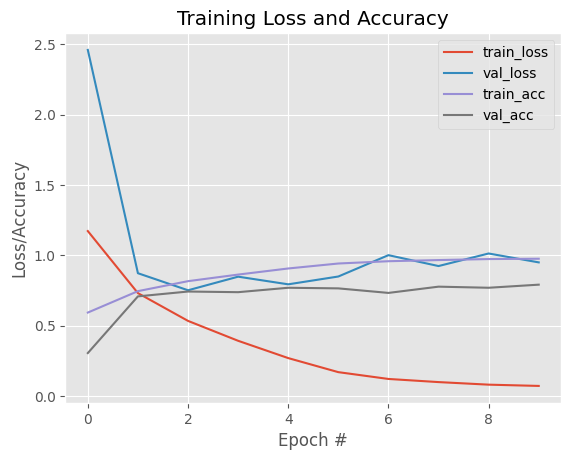

In [20]:
# Compilamos el modelo y entrenamos
model_cnn.compile(optimizer=Adam(learning_rate=0.001),
              loss="sparse_categorical_crossentropy", # Etiquetas categoricas
              #loss="categorical_crossentropy"         #Etiquetas one-hot.encoding (e.g [0,0,0,1])
              metrics=["accuracy"]
             )
# Entrenamos el perceptrón multicapa
print("[INFO]: Entrenanado la red neuronal...")
H = model_cnn.fit(x_tr, y_tr, epochs=10, batch_size=128, validation_data=(x_val, y_val))


# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(model_cnn, x_te, y_test)

## **REDUCIENDO OVERFITTING MEDIANTE DATA AUGMENTATION**

#### **- Acondicionando dataset**

In [21]:
# Binarizar etiquetas - por si es necesario convertir a one-hot encoding
# Pasamos de categorical a one-hot-encoding
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_tr_ohe = lb.fit_transform(y_tr)
y_val_ohe = lb.transform(y_val)
y_test_ohe = lb.transform(y_test)

#### **- Creando un contenedor DataGenerator para el aumento automático de muestras**

In [22]:
#Crear Data Generation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip =True,
    vertical_flip =False,
    zoom_range=0.2
)


#### **- Inspeccionando las muestras generadas sintéticamente**

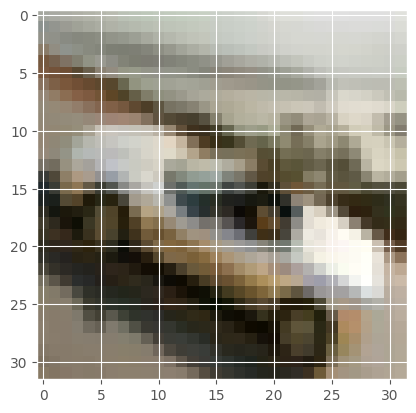

Label = Automóvil


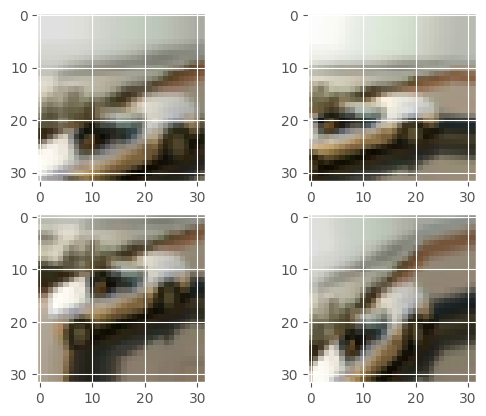

In [23]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

sample = 101
plt.imshow(image.array_to_img(x_tr[sample]))
plt.show()
print('Label = {}'.format(labelNames[y_tr[sample][0]]))

fig, axes = plt.subplots(2,2)
i = 0
for batch in datagen.flow(x_tr[sample].reshape((1,32,32,3)),batch_size=1):
    #plt.figure(i)
    axes[i//2,i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break
plt.show()

#### **- Creando la topología de red neuronal y entrenándola: CNN**

In [24]:
# Arquitectura de red - modo API Funcioanl
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

#Definicion de Hiperparámetro
batch_size=128
learning_rate=0.001
epochs=10
# Definimos la entrada
input = layers.Input(shape=(x_tr.shape[1], x_tr.shape[2], x_tr.shape[3]))

# 1.BASE MODEL
# Bloque 1
x1 = layers.Conv2D(32, (3,3), padding="same", activation="relu")(input)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Conv2D(32, (3,3), padding="same", activation="relu")(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.MaxPooling2D(pool_size=(2,2))(x1)
#Se podría añador dropout

# Bloque 2
x2 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(x1)
x2 = layers.BatchNormalization()(x2)
x2 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(x2)
x2 = layers.BatchNormalization()(x2)
x2 = layers.MaxPooling2D(pool_size=(2,2))(x2)

# Bloque 3
x3 = layers.Conv2D(256, (3,3), padding="same", activation="relu")(x2)
x3 = layers.BatchNormalization()(x3)
x3 = layers.Conv2D(256, (3,3), padding="same", activation="relu")(x3)
x3 = layers.BatchNormalization()(x3)
x3 = layers.MaxPooling2D(pool_size=(2,2))(x3)

# 2.TOP MODEL

xfc = layers.Flatten()(x3)
xfc = layers.Dense(512, activation="relu")(xfc)
xfc = layers.BatchNormalization()(xfc)
#Se podría añador dropout
predictions = layers.Dense(10, activation="softmax")(xfc)

# 3. Unimos las entradas y salidas del modelo

model_cnn_aug = Model(inputs=input, outputs=predictions)


model_cnn_aug.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0   

[INFO]: Entrenanado la red neuronal...
Epoch 1/10
351/351 [==============================] - 55s 146ms/step - loss: 1.5366 - accuracy: 0.4556 - val_loss: 2.6661 - val_accuracy: 0.2386
Epoch 2/10
351/351 [==============================] - 35s 100ms/step - loss: 1.1607 - accuracy: 0.5848 - val_loss: 1.1825 - val_accuracy: 0.6114
Epoch 3/10
351/351 [==============================] - 31s 88ms/step - loss: 0.9799 - accuracy: 0.6556 - val_loss: 0.8941 - val_accuracy: 0.6942
Epoch 4/10
351/351 [==============================] - 31s 88ms/step - loss: 0.8637 - accuracy: 0.6957 - val_loss: 0.8681 - val_accuracy: 0.7066
Epoch 5/10
351/351 [==============================] - 30s 85ms/step - loss: 0.7726 - accuracy: 0.7291 - val_loss: 1.1402 - val_accuracy: 0.6188
Epoch 6/10
351/351 [==============================] - 31s 89ms/step - loss: 0.7137 - accuracy: 0.7502 - val_loss: 1.0516 - val_accuracy: 0.6808
Epoch 7/10
351/351 [==============================] - 32s 90ms/step - loss: 0.6654 - accuracy: 

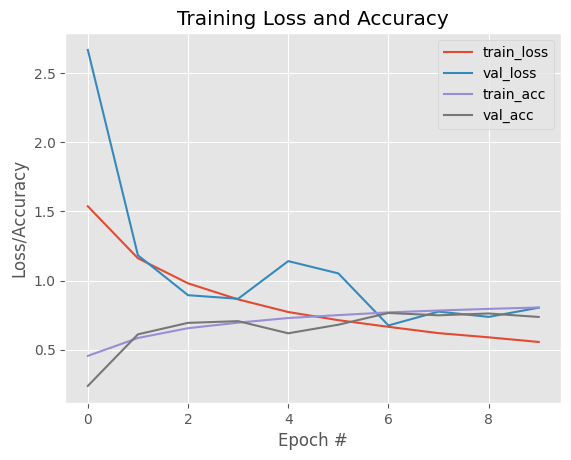

In [25]:
# Compilamos el modelo y entrenamos
model_cnn_aug.compile(optimizer=Adam(learning_rate=learning_rate),
              loss="categorical_crossentropy", # Etiquetas categoricas
              #loss="categorical_crossentropy"         #Etiquetas one-hot.encoding (e.g [0,0,0,1])
              metrics=["accuracy"]
             )
# Entrenamos el perceptrón multicapa
print("[INFO]: Entrenanado la red neuronal...")
H = model_cnn_aug.fit(datagen.flow(x_tr, y_tr_ohe, batch_size=batch_size),
                      epochs=epochs,
                      steps_per_epoch=x_tr.shape[0] // batch_size,
                      validation_data=(x_val, y_val_ohe)
                      )


# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(model_cnn_aug, x_te, y_test)
#drive.mount("")
#model_cnn_aug.save(BASE_FOLDER + "deepCC_CIFAR10.h5")#h5 formato para keras

**EJERCICIO PROPUESTO:** Modificar la ejecución con Data Augmentation para que sea directamente comparable a la ejecución por defecto. Para ello, el validation data debe ser correcto. Pista: Llevar a cabo el validation split cuando se instancia el objeto ImageDataGenerator. El método flow también se verá afectado (leer documentación).

## **TRABAJANDO CON REDES PRE-ENTRENADAS: TRANSFER LEARNING & FINE-TUNING**


#### **- Cargando el conjunto de datos y acondicionándolo como en la VGG**

In [ ]:
# Imports necesarios

# Importando y normalizando el set de datos CIFAR10

# One-hot encoding

# IMPORTANTE: Se normalizan los datos como se normalizaron en el entrenamiento con ImageNet!!



#### **- Cargando la topología de CNN (base model)**

In [26]:
# keras incluye varias arquitecturas
# VGG16, VGG19, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, RasNet
# documentacion https://keras.io/applications/
# Visual Geometry Group 16 / 19 (numero de layers)
# 1 y 2 en la competicion ImageNet 2014
# Kernels pequeños de 3x3

# Cargar arquitectura y pesos
from tensorflow.keras.applications import VGG16
base_model = VGG16 (weights = "imagenet",
                    include_top = False,
                    input_shape=(32,32,3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

#### **- Creando el top model y congelando TODAS las capas convolucionales (TRANSFER LEARNING)**

In [28]:
# No entrenamos el base model
base_model.trainable=False

# Conectar el modelo con el top model
pre_train_model = Sequential()
pre_train_model.add(base_model)
pre_train_model.add(layers.Flatten())
pre_train_model.add(layers.Dense(256, activation="relu"))
pre_train_model.add(layers.Dense(10, activation="softmax"))
pre_train_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dense_19 (Dense)            (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


#### **- Entrenando la solución**

[INFO]: Entrenanado la red neuronal...
Epoch 1/10
351/351 [==============================] - 38s 102ms/step - loss: 1.6114 - accuracy: 0.4360 - val_loss: 1.3357 - val_accuracy: 0.5230
Epoch 2/10
351/351 [==============================] - 34s 98ms/step - loss: 1.4424 - accuracy: 0.4949 - val_loss: 1.3256 - val_accuracy: 0.5308
Epoch 3/10
351/351 [==============================] - 43s 123ms/step - loss: 1.3926 - accuracy: 0.5092 - val_loss: 1.2524 - val_accuracy: 0.5540
Epoch 4/10
351/351 [==============================] - 36s 102ms/step - loss: 1.3721 - accuracy: 0.5192 - val_loss: 1.2328 - val_accuracy: 0.5594
Epoch 5/10
351/351 [==============================] - 43s 123ms/step - loss: 1.3414 - accuracy: 0.5257 - val_loss: 1.2202 - val_accuracy: 0.5640
Epoch 6/10
351/351 [==============================] - 32s 91ms/step - loss: 1.3324 - accuracy: 0.5308 - val_loss: 1.1976 - val_accuracy: 0.5794
Epoch 7/10
351/351 [==============================] - 31s 89ms/step - loss: 1.3179 - accuracy

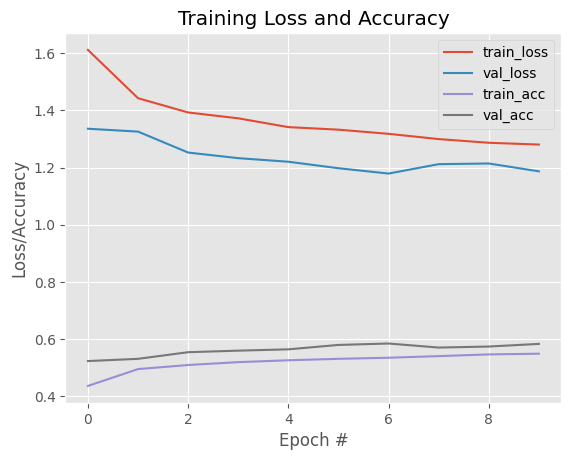

In [29]:
# Compilamos el modelo y entrenamos
pre_train_model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss="categorical_crossentropy", # Etiquetas categoricas
              #loss="categorical_crossentropy"         #Etiquetas one-hot.encoding (e.g [0,0,0,1])
              metrics=["accuracy"]
             )
# Entrenamos el perceptrón multicapa
print("[INFO]: Entrenanado la red neuronal...")
H = pre_train_model.fit(datagen.flow(x_tr, y_tr_ohe, batch_size=batch_size),
                      epochs=epochs,
                      steps_per_epoch=x_tr.shape[0] // batch_size,
                      validation_data=(x_val, y_val_ohe)
                      )


# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(pre_train_model, x_te, y_test)
#drive.mount("")
#model_cnn_aug.save(BASE_FOLDER + "deepCC_CIFAR10.h5")#h5 formato para keras

#### **- Creando el top model y descongelando bloques convolucionales (FINE TUNING)**

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

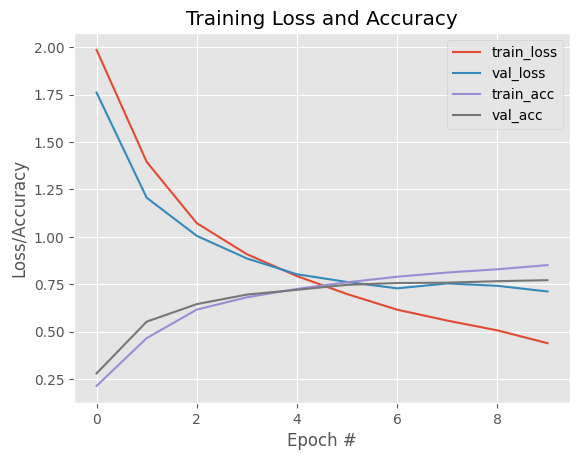

In [30]:
from tensorflow.keras.applications import VGG16
base_model = VGG16 (weights = "imagenet",
                    include_top = False,
                    input_shape=(32,32,3))
base_model.summary()

#Congelamos parcialmente

for layer in base_model.layers:
  if layer.name == "block3_conv1":
    break
  layer.trainable = False
  print("Capa" + layer.name + "congelada...")
pre_train_model = Sequential()
pre_train_model.add(base_model)
pre_train_model.add(layers.Flatten())
pre_train_model.add(layers.Dense(256, activation="relu"))
pre_train_model.add(layers.Dense(10, activation="softmax"))
pre_train_model.summary()


#Definicion de Hiperparámetro
batch_size=128
learning_rate=0.001
epochs=10
num_clases=10


pre_train_model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss="categorical_crossentropy", # Etiquetas categoricas
              #loss="categorical_crossentropy"         #Etiquetas one-hot.encoding (e.g [0,0,0,1])
              metrics=["accuracy"]
             )
# Entrenamos el perceptrón multicapa
print("[INFO]: Entrenanado la red neuronal...")
H = pre_train_model.fit(x_tr, y_tr_ohe,
                        batch_size=batch_size,
                        epochs=epochs,
                        steps_per_epoch=x_tr.shape[0] // batch_size,
                        validation_data=(x_val, y_val_ohe)
                       )


# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(pre_train_model, x_te, y_test)

In [ ]:
# Imports que vamos a necesitar

# Cargamos el dataset CIFAR10

# Normalizamos las entradas de idéntica forma a como lo hicieron para entrenar la VGG16 en imageNet

# Definimos dimensiones de nuestros datos de entrada y lista con las categorias de las clases

# En caso de inestabilidades numéricas pasar datos a one-hot encoding

# Importamos VGG16 con pesos de imagenet y sin top_model especificando tamaño de entrada de datos

# Mostramos la arquitectura

# Congelamos las capas de los 4 primeros bloques convolucionales, el quinto se re-entrena
# En base_model.layers.name tenemos la información del nombre de la capa

# Cogemos la última capa del model y le añadimos nuestro clasificador (top_model)

# Compilamos el modelo y entrenamos

# Entrenamos el perceptrón multicapa

# Learning curves
visualize_learning_curve(...)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(...)

# Almaceno el modelo en Drive

**EJERCICIO PROPUESTO:** Combinar fine tuning con la técnica de data augmentation para reducir overfitting.

## **VISUALIZANDO POR DENTRO UNA CNN**

#### **- Visualizar activaciones intermedias**

- Visualizar el output de las capas de la red
- 2D imagen por canal

In [ ]:
%tensorflow_version 1.x
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer

# Importando y normalizando el set de datos CIFAR10
print("[INFO]: Loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]

#One-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
from keras.models import load_model
model_augmentation = load_model(BASE_FOLDER+'resources/convnet_augmentation.h5')
model_augmentation.summary()

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img
%matplotlib inline

# Visualizando imagen
sample = 1000
input_img = trainX[sample].reshape((1,32,32,3))
plt.imshow(array_to_img(trainX[sample]))
plt.show()

In [ ]:
# Modificar el modelo para que nos devuelva los mapas de activación


In [ ]:
# Visualización de la salida de un filtro - activacion, 32 canales, feature map de 30x30


In [ ]:
# Visualización de las activaciones en todas las capas



### Interpretacion
- Capas iniciales son como detectores de bordes
- Capas más profundas son más difíciles de interpretar (abstractas) y tienen información relativa a la clase de imagen
- La activación de capas profundas es más dispersa (sparse)

#### **- Visualizar filtros convolucionales**

- Visualizar las imagenes que maximizan la respuesta a un filtro

In [ ]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',include_top=False)
model.summary()

In [ ]:
import numpy as np

def gen_max_response_pattern(layer_name, filter_index, size=32):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:,:,:,filter_index])

    # Para obtener el patron que responde de forma máxima, utilizamos descenso del gradiente
    grads = K.gradients(loss,model.input)[0] # Seleccionar el primero, ya que esto devuelve una lista
    # Normalización para ayudar al proceso del gradiente
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) # Última constante para evitar dividir por 0
    # Definir funcion que calcula la pérdida y el gradiente de la imagen
    iterate = K.function([model.input], [loss,grads])
    loss_value, grads_value = iterate([np.zeros((1,size,size,3))])

    # Iniciamos con imagen aleatoria
    input_img_data = np.random.random((1,size,size,3)) * 20 + 128

    step = 1. # Magnitud de cada actualizacion en el gradiente
    n_steps = 40 # Número de iteraciones
    for i in range(n_steps):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    # Procesar la imagen resultante
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.1
    img += 0.5
    img = np.clip(img,0,1)
    img *= 255
    img = np.clip(img,0,255).astype('uint8')

    return img

In [ ]:
# mostrar un patron para un filtro
import matplotlib.pyplot as plt
%matplotlib inline

layer_name = 'block2_conv1'
filter_index = 112 # canal a estudiar

img = gen_max_response_pattern(layer_name,filter_index,32)
plt.imshow(img)

**EJERCICIO PROPUESTO:** Mostrar los patrones de maxima activacion para todos los filtros de una capa.

#### **- Visualizar hetmaps de activación por clase**

- Útil para averiguar qué partes de la imagen contribuyen más a la decisión
- Interesante para saber qué pasa cuando se cometen errores

In [ ]:
# Técnica utiliza gradientes Ramprasaath, R. Selvaraju et al. (2017). https://arxiv.org/abs/1610.02391
from keras.applications import VGG16

model = VGG16(weights='imagenet',include_top=True)

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# Cargar imagen de gato
img = image.load_img(BASE_FOLDER+'resources/cat.jpg', target_size=(224,224))
x = image.img_to_array(img) # a array de (224,224,3)
x = np.expand_dims(x, axis=0) # a array de (1,224,224,3)
x = preprocess_input(x)

In [ ]:
# Testeando el output
prediction = model.predict(x)
print(decode_predictions(prediction))

In [ ]:
tabby_output_index = np.argmax(prediction[0])
tabby_output = model.output[:,tabby_output_index]
last_conv_layer = model.get_layer('block5_conv3')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K

grads = K.gradients(tabby_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0,1,2))
iterate = K.function( [model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

# Multiplicar cada canal en el feature map por como de importante el canal es con respecto a la clase "tabby"
for i in range(512):
    conv_layer_output_value[:,:,i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

# Visualizar
heatmap = np.maximum(heatmap,0)
heatmap /= np.max(heatmap)
fig,axes = plt.subplots(1,2)
axes[0].matshow(heatmap)
axes[1].imshow(img)
plt.show()

**EJERCICIO PROPUESTO:** Obtener el heatmap para las otras clases en la lista de prediccion (Egyptian_cat, tiger_cat, etc.).